In [56]:
def download_progress_hook(count, blockSize, totalSize):
    """A hook to report the progress of a download. This is mostly intended for users with
    slow internet connections. Reports every 5% change in download progress."""
    global last_percent_reported
    percent = int(count * blockSize * 100 / totalSize)

    if last_percent_reported != percent:
        if percent % 5 == 0:
            sys.stdout.write("%s%%" % percent)
            sys.stdout.flush()
        else:
            sys.stdout.write(".")
            sys.stdout.flush()
        last_percent_reported = percent

def read_df(filename, expected_bytes=None, force=False):
    """Download a file if not present, and make sure it's the right size."""
    dest_filename = os.path.join(data_root, filename)
    dir = dest_filename[:dest_filename.rfind('/')]
    if not os.path.exists(dir):
        os.makedirs(dir)
    if force or not os.path.exists(dest_filename):
        print('Attempting to download:', filename)
        filename, _ = urlretrieve(root_url + filename, dest_filename, reporthook=download_progress_hook)
        print('\nDownload Complete!')
    return np.array(pd.read_csv(filename, header=None))

# read_df(spectf_test)
# iris_addr = 'iris/iris.data'
# wine_addr = 'wine/wine.data'
# glass_addr = 'glass/glass.data'
# spectf_train = 'spect/SPECTF.train'
# spectf_test = 'spect/SPECTF.train'

In [57]:
def sda(num,clusterMembersNum=100) :
    "This function will generate random datasets : sda1,sda2,sda3"
    seed = 0
    np.random.seed(seed)
    dataset = None
    if num == 1 :
        "generating sda1 according to its table in essay"
        dataset = np.concatenate([np.random.uniform(0,20,(clusterMembersNum,2)),
        np.random.uniform(40,60,(clusterMembersNum,2)),
        np.random.uniform(80,100,(clusterMembersNum,2))])
    elif num == 2 :
        "generating sda2 according to its table in essay"
        dataset = np.concatenate([np.random.uniform(0,20,(clusterMembersNum,2)),
        np.random.uniform(40,60,(clusterMembersNum,2)),
        np.random.uniform(80,100,(clusterMembersNum,2)),
        np.array([[np.random.uniform(0,20),np.random.uniform(80,100)] for i in range(clusterMembersNum)])])
    else :
        "generating sda3 according to its table in essay"
        dataset = np.concatenate([np.random.uniform(0,20,(clusterMembersNum,2)),
        np.random.uniform(40,60,(clusterMembersNum,2)),
        np.random.uniform(80,100,(clusterMembersNum,2)),
        np.array([[np.random.uniform(80,100),np.random.uniform(0,20)] for i in range(clusterMembersNum)]),
        np.array([[np.random.uniform(0,20),np.random.uniform(180,200)] for i in range(clusterMembersNum)]),
        np.array([[np.random.uniform(180,200),np.random.uniform(0,20)] for i in range(clusterMembersNum)]),
        np.array([[np.random.uniform(180,200),np.random.uniform(80,100)] for i in range(clusterMembersNum)]),
        np.array([[np.random.uniform(180,200),np.random.uniform(180,200)] for i in range(clusterMembersNum)])])
    return np.array(dataset)

In [58]:
from __future__ import print_function
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import os
import sys
import random
import copy
import math
from six.moves.urllib.request import urlretrieve
# from six.moves import cPickle as pickle

%matplotlib inline

In [59]:
X = np.array([[1, 2], [1, 4], [1, 0],
               [4, 2], [4, 4], [4, 0]])
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
kmeans.cluster_centers_
# kmeans.predict([[0, 0], [4, 4]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[4., 4.],
       [1., 0.],
       [4., 0.],
       [1., 4.],
       [1., 2.],
       [4., 2.]])

In [60]:
# Data loading params
data_root = ''
root_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/'
iris_addr = 'iris/iris.data'
wine_addr = 'wine/wine.data'
glass_addr = 'glass/glass.data'
spectf_train = 'spect/SPECTF.train'
spectf_test = 'spect/SPECTF.test'
last_percent_reported = None # needed for showing progress in download

# seed initialization
seed = 0
random.seed(seed)
np.random.seed(seed)

# color map for data visualization
LABEL_COLOR_MAP = {
    0 : 'r',
    1 : '#006266',
    2 : 'g',
    3 : 'B',
    4 : 'c' ,
    5 : 'm' ,
    6 : 'y' ,
    7 : '#C4E538'
}

# Quantum genetic algorithm essay params
pop_size = 100
N_max = (100,300)
n_max = 15
m_max = 25
pc = 0.9
pm = 0.01
pcc = (1 - pc) * random.random() + pc
pmm = (2*pm - pm) * random.random() + pm

In [61]:
class ToolBox :
    @staticmethod
    def translate(value, leftMin, leftMax, rightMin, rightMax):
        """this function will map value from range(leftMin,leftMax)
        to range(rightMin,rightMax)"""
        # Figure out how 'wide' each range is
        leftSpan = leftMax - leftMin
        rightSpan = rightMax - rightMin

        # Convert the left range into a 0-1 range (float)
        valueScaled = float(value - leftMin) / float(leftSpan)
        value = int(rightMin + (valueScaled * rightSpan))
        if value == rightMax :
            value = rightMax - 1
        # Convert the 0-1 range into a value in the right range.
        return value

    @staticmethod
    def euclideanDistance(x,y):
        "return euclidean distance between x and y"
        e = 0
        for i,j in zip(x,y):
            e += (i - j)**2
        return np.sqrt(e)

In [65]:
class Qbit :
    def __init__(self) :
        self.a = random.random()
        self.b = np.sqrt(1 - self.a**2)
        self.bit = None

    def __str__(self) :
        return '({}, {})'.format(self.a,self.b)

    def mutate(self) :
        self.a,self.b = self.b,self.a

    def toBit(self) :
        "transform qbit to zero or one"
        if random.random() < self.a**2 :
            self.bit = 0
        else :
            self.bit = 1
        return self.bit
    def rotate(self,bi,isGreater) :
        dt = 0
        sign = 0
        ri = self.bit
        positive = self.a * self.b > 0
        aZero = not self.a
        bZero = not self.b
        # initializing angle and sign of rotation
        if(isGreater) :
            if not ri and bi :
                dt = np.pi * .05
                if aZero :
                    sign = 1
                elif bZero :
                    sign = 0
                elif positive :
                    sign = -1
                else :
                    sign = 1
            elif ri and not bi :
                dt = np.pi * .025
                if aZero :
                    sign = 0
                elif bZero :
                    sign = 1
                elif positive :
                    sign = 1
                else :
                    sign = -1
            elif ri and bi :
                dt = np.pi * .025
                if aZero :
                    sign = 0
                elif bZero :
                    sign = 1
                elif positive :
                    sign = 1
                else :
                    sign = -1
        else :
            if ri and not bi :
                dt = np.pi * .01
                if aZero :
                    sign = 1
                elif bZero :
                    sign = 0
                elif positive :
                    sign = -1
                else :
                    sign = 1
            elif ri and bi :
                dt = np.pi * .005
                if aZero :
                    sign = 0
                elif bZero :
                    sign = 1
                elif positive :
                    sign = 1
                else :
                    sign = -1

        t = sign * dt
        self.a,self.b = np.dot(
            np.array([[np.cos(t),-np.sin(t)],[np.sin(t),np.cos(t)]]),np.array([self.a,self.b])
        )

In [66]:
class Pattern :
    def __init__(self,size) :
        self.size = size
        self.clusterMembers = None
        self.centroid = None
        self.id = np.array([])
        for _ in range(size) :
            self.id = np.append(self.id,Qbit())
        self.real = None

    def __str__(self) :
        return '({})'.format(self.real)

    def toReal(self,maxValue) :
        "transform pattern to real number which is centroid position"
        self.real = 0
        for i,qbit in enumerate(self.id) :
            self.real += qbit.toBit()*np.power(2,self.size - i - 1)
        self.real = ToolBox.translate(
                self.real,0,
                np.power(2,len(self.id))-1,
                0,maxValue) # fit generated number to length of the dataset
        return self.real

    def rotate(self,b,isGreater) :
        "rotate each qbit"
        for i,qbit in enumerate(self.id) :
            qbit.rotate(b.id[i],isGreater)

    def mutate(self,pos) :
        "will mutate the qbit in position {pos} in pattern"
        self.id[pos].mutate()

In [67]:
class Chromosome :
    def __init__(self,cSize,iSize) :
        self.size = cSize
        self.iSize = iSize
        self.fitness = float('-inf')
        self.r = np.array([])
        if (cSize == 0) :
            print(cSize)
            print('hi babe')
        for _ in range(cSize) :
            self.r = np.append(self.r,Pattern(iSize))

    def __str__(self) :
        return str([p.real for p in self.r])

    def __len__(self) :
        return self.iSize * self.size

    def toReal(self,dpSize,dataset) :
        "transforming each pattern to real number"
        for p in self.r :
            p.toReal(dpSize)
        isEqualReal = True
        while isEqualReal :
            isEqualReal = False
            #check if there is two pattern with same real number
            for p in self.r :
                for p2 in self.r :
                    if p != p2 :
                        while np.min([i == j for i,j in zip(dataset[p.real],dataset[p2.real])]) :
                            isEqualReal = True
                            p.toReal(dpSize)

    def rotate(self,b,isGreater) :
        for i,pattern in enumerate(self.r) :
            pattern.rotate(b.r[i],isGreater)

    def mutate(self) :
        "generating a random number and change a and b in position of rnd in chromosome"
        rnd = np.random.randint(0,self.__len__())
        pos = self.patternPos(rnd)
        self.r[pos[0]].mutate(pos[1])
    def computeFitness(self,dataset) :
        self.toReal(len(dataset),dataset)
#         self._kMeansClustering(dataset)
        self._alocateCluster(dataset)
        self._calculateCentroid(dataset)
        s = [np.mean([ToolBox.euclideanDistance(pattern.centroid, member) \
                      for member in dataset[pattern.clusterMembers]]) for pattern in self.r]
        self.fitness = 1/np.mean([np.max([(s[i] + s[j])/ToolBox.euclideanDistance(pattern.centroid,pattern2.centroid) \
                                for j,pattern2 in enumerate(self.r) if i != j]) for i,pattern in enumerate(self.r)])
        return self.fitness

    def _kMeansClustering(self,dataset) :

        kmeans = KMeans(n_clusters=self.size,init=np.array([dataset[pattern.real] for pattern in self.r]),n_init=1).fit(dataset)
#         kmeans = KMeans(n_clusters=self.size).fit(dataset)

        "Alocating data points to each cluster via their euclidean distance"
        for i,pattern in enumerate(self.r) :
            self.r[i].clusterMembers = np.array([]).astype(int)

        for i,label in enumerate(kmeans.labels_) :
            self.r[label].clusterMembers = np.append(self.r[label].clusterMembers,i)

        "Calculate each centroid point via mean of every cluster member"
        self._calculateCentroid(dataset)
#         for i,pattern in enumerate(self.r):
#             # calculating centroid for every cluster
#             self.r[i].centroid = kmeans.cluster_centers_[i]

    def _alocateCluster(self,dataset) :
        "Alocating data points to each cluster via their euclidean distance"
        for i,centroid in enumerate(self.r) :
            self.r[i].clusterMembers = np.array([]).astype(int)

        for i,data in enumerate(dataset):
            minDist = float('inf')
            minCentroidIndex = -1
            for j,centroid in enumerate(self.r) :
                dist = ToolBox.euclideanDistance(dataset[i],dataset[centroid.real])
                if dist < minDist :
                    minCentroidIndex = j
                    minDist = dist
            self.r[minCentroidIndex].clusterMembers = np.append(self.r[minCentroidIndex].clusterMembers,i)
    def _calculateCentroid(self,dataset) :
        "Calculate each centroid point via mean of every cluster member"
        for pattern in self.r:
            # calculating centroid for every cluster
            if len(pattern.clusterMembers) == 0 :
                print(pattern.clusterMembers)
            pattern.centroid = np.mean(dataset[pattern.clusterMembers],axis=0)

    def patternPos(self,qbitPos) :
        """calculating the position of the qbit in pattern
        return (patternPos,qbitInPatternPos)"""

        if qbitPos >= self.__len__() :
            print('warning ' + str(qbitPos))
            print(int(np.floor(qbitPos/self.iSize)),int(qbitPos % self.iSize))

        return (int(np.floor(qbitPos/self.iSize)),int(qbitPos % self.iSize))


In [68]:
class Population :
    def __init__(self,pSize,cSize,iSize) :
        self.size = pSize
        self.cSize = cSize
        self.iSize = iSize
        self.bestChromosomeIndex = None
        self.p = np.array([])
        for _ in range(pSize) :
            self.p = np.append(self.p,Chromosome(cSize,iSize))

    def toReal(self) :
        for c in self.p :
            c.toReal()

    def rotate(self,bestChoromosome) :

        for chromosome in self.p :
            # checking if the length of the chromosomes are the same as th
            if len(chromosome) > len(bestChoromosome) :
                chrom = Chromosome(int(np.ceil(len(bestChoromosome)/self.iSize)),self.iSize)
                for i in range(len(chrom)) :
                    chromPatternPos = chrom.patternPos(i)
                    chrom.r[chromPatternPos[0]].id[chromPatternPos[1]] = chromosome.r[chromPatternPos[0]].id[chromPatternPos[1]]
                chromosome = chrom
            elif len(chromosome) < len(bestChoromosome) :
                chrom = Chromosome(int(np.ceil(len(bestChoromosome)/self.iSize)),self.iSize)
                for i in range(len(chromosome)) :
                    chromPatternPos = chrom.patternPos(i)
                    chrom.r[chromPatternPos[0]].id[chromPatternPos[1]] = chromosome.r[chromPatternPos[0]].id[chromPatternPos[1]]
                chromosome = chrom
            chromosome.rotate(bestChoromosome,bestChoromosome.fitness > chromosome.fitness)

    def mutate(self,prob) :
        for chromosome in self.p :
            rnd = random.random()
            if rnd < prob :
                chromosome.mutate()

    def computeFitness(self,dataset) :
        maxFit = float('-inf')
        for i,chromosome in enumerate(self.p) :
            chromosome.computeFitness(dataset)
            if chromosome.fitness > maxFit :
                maxFit = chromosome.fitness
                self.bestChromosomeIndex = i
        return maxFit
    def eliteSelection(self,population) :
        maxFit = np.max([ch.fitness for ch in population.p])
        if self.p[self.bestChromosomeIndex].fitness > maxFit :
            for ch in sorted(self.p, key=lambda x: x.fitness) :
                if ch.fitness > maxFit :
                    population.p[np.random.randint(0,self.size)] = copy.deepcopy(ch)
        return population

    def selection(self) :
        population = Population(self.size,self.cSize,self.iSize)
        # Roulette selection
        for i in range(self.size) :
            population.p[i] = copy.deepcopy(self.roulette())
        # Elite selection
        maxFit = np.max([ch.fitness for ch in population.p])
        if self.p[self.bestChromosomeIndex].fitness > maxFit :
            for ch in sorted(self.p, key=lambda x: x.fitness) :
                if ch.fitness > maxFit :
                    population.p[np.random.randint(0,self.size)] = copy.deepcopy(ch)
        return population

    def roulette(self) :
        sumFit = np.sum([ch.fitness for ch in self.p])
        pick = random.uniform(0, sumFit)
        current = 0
        for chromosome in self.p:
            current += chromosome.fitness
            if current > pick:
                return chromosome

    def catastrophe(self,bestChromosome) :
        self.__init__(self.size,self.cSize,self.iSize)
        self.p[0] = copy.deepcopy(bestChromosome)

    def crossover(self,prob,method='first',dataset=None) :
        population = Population(self.size,self.cSize,self.iSize)
        for i in range(int(self.size/2)) :
            self._mating(prob,population,i,method)
        if method == 'first' :
            population.computeFitness(dataset)
            return self.eliteSelection(population)
        else :
            return population
    def _mating(self,prob,population,j,method='first') :
        firstPoint = 0
        secondPoint = 0
        isDiffrentParent = False
        if method == 'first' :
            parent1 = copy.deepcopy(self.roulette())
            parent2 = copy.deepcopy(self.roulette())
        else :
            parent1 = copy.deepcopy(self.p[np.random.randint(0,self.size)])
            parent2 = copy.deepcopy(self.p[np.random.randint(0,self.size)])
        # finding the standard points for crossover
        if random.random() <= prob:
            isStandardPoint = False
            while (not isStandardPoint) :
                firstPoint = np.random.randint(0,len(parent1))
                secondPoint = np.random.randint(0,len(parent2))
                firstChildLen = (firstPoint + len(parent2) - secondPoint)
                secondChildLen = (len(parent1) - firstPoint + secondPoint)
                isStandardPoint = (firstChildLen % self.iSize == 0) and (firstChildLen/self.iSize > 1) and \
                    (secondChildLen % self.iSize == 0) and (secondChildLen/self.iSize > 1)
        # 2 point crossover
        firstChildLen = firstPoint + len(parent2) - secondPoint
        secondChildLen = len(parent1) - firstPoint + secondPoint
        child1 = Chromosome(int(np.ceil(firstChildLen/self.iSize)),self.iSize)
        child2 = Chromosome(int(np.ceil(secondChildLen/self.iSize)),self.iSize)
        for i in range(firstChildLen) :
            childPatternPos = child1.patternPos(i)
            if i < firstPoint :
                parentPatternPos = parent1.patternPos(i)
                child1.r[childPatternPos[0]].id[childPatternPos[1]] = parent1.r[parentPatternPos[0]].id[parentPatternPos[1]]
            else :
                parentPatternPos = parent2.patternPos(secondPoint + (i - firstPoint))
                child1.r[childPatternPos[0]].id[childPatternPos[1]] = parent2.r[parentPatternPos[0]].id[parentPatternPos[1]]

        for i in range(secondChildLen) :
            childPatternPos = child2.patternPos(i)
            if i < secondPoint :
                parentPatternPos = parent2.patternPos(i)
                child2.r[childPatternPos[0]].id[childPatternPos[1]] = parent2.r[parentPatternPos[0]].id[parentPatternPos[1]]
            else :
                parentPatternPos = parent1.patternPos(firstPoint + (i - secondPoint))
                child2.r[childPatternPos[0]].id[childPatternPos[1]] = parent1.r[parentPatternPos[0]].id[parentPatternPos[1]]
        population.p[2*j] = copy.deepcopy(child2)
        population.p[2*j+1] = copy.deepcopy(child1)

In [69]:
def quantumGeneticAlgorithm(dataset,popSize,pcc,pc,pm,pmm,preCriterion,catCriterion,iterNum,initPatternNum = None) :
    "main method, we will implement algorithm in it"
    bestFitArr = np.array([])
    bestFitCentArr = np.array([])
    bestChromosome = None
    bestSameIter = 0
    bestFitness = float('-inf')
    populations = np.full((iterNum),None)
    # randomly choosing initial pattern number in a chromosome in range(2,np.sqrt(N) + 1)
    if initPatternNum :
        initialPatternNum = initPatternNum
    else :
        initialPatternNum = random.randint(2,np.floor(np.sqrt(len(dataset)) + 1))
    PatternSize = int(np.ceil(np.log2(len(dataset))))
    populations[0] = Population(popSize,initialPatternNum,PatternSize)
    bestFit = populations[0].computeFitness(dataset)
    bestFitArr = np.append(bestFitArr,bestFit)
    bestFitCentArr = np.append(bestFitCentArr,len(populations[0].p[populations[0].bestChromosomeIndex].r))
    if bestFit > bestFitness :
        bestChromosome = copy.deepcopy(populations[0].p[populations[0].bestChromosomeIndex])
        bestFitness = bestFit
        bestSameIter = 0
    else :
        bestSameIter += 1
    for generation in range(1,iterNum) :
        print('--------------------generation : {} ------------------'.format(generation))
        print('best fitness : {}'.format(bestFit))
        print('best chromosome cluster numbers : {}'.format(len(bestChromosome.r)))
        print('best chrom fit : {}'.format(bestFitness))
        print('best chrom cluster numbers : {}'.format(len(bestChromosome.r)))
        if bestSameIter < preCriterion :
            populations[generation - 1] = populations[generation - 1].selection()
#             populations[generation - 1] = populations[generation - 1].crossover(pc,'second',dataset)
            populations[generation - 1].mutate(pm)
            bestFit = populations[generation - 1].computeFitness(dataset)
            if bestFit > bestFitness :
                bestChromosome = copy.deepcopy(populations[generation - 1].p[populations[generation - 1].bestChromosomeIndex])
                bestFitness = bestFit
                bestSameIter = 0
            if bestSameIter < catCriterion :
                populations[generation - 1].rotate(bestChromosome)
            else :
                populations[generation - 1].catastrophe(bestChromosome)
                bestSameIter = 0
        else :
            populations[generation - 1] = populations[generation - 1].selection()
#             populations[generation - 1] = populations[generation - 1].crossover(pcc,'second',dataset)
            populations[generation - 1].mutate(pmm)
            bestFit = populations[generation - 1].computeFitness(dataset)
            if bestFit > bestFitness :
                bestChromosome = copy.deepcopy(populations[generation - 1].p[populations[generation - 1].bestChromosomeIndex])
                bestFitness = bestFit
                bestSameIter = 0
            if bestSameIter < catCriterion :
                populations[generation - 1].rotate(bestChromosome)
            else :
                populations[generation - 1].catastrophe(bestChromosome)
                bestSameIter = 0

        populations[generation] = populations[generation - 1]
        bestFit = populations[generation].computeFitness(dataset)
        bestFitCentArr = np.append(bestFitCentArr,len(populations[generation].p[populations[generation].bestChromosomeIndex].r))
        bestFitArr = np.append(bestFitArr,bestFit)
        if bestFit > bestFitness :
            bestChromosome = copy.deepcopy(populations[generation].p[populations[generation].bestChromosomeIndex])
            bestFitness = bestFit
            bestSameIter = 0
        else :
            bestSameIter += 1
    return bestFitArr,bestChromosome

In [70]:
def colorMapGenerator(clusters,dataset) :
    "this color will assign color to each data point in dataset"
    c = np.full((len(dataset)),None)
    for i,cluster in enumerate(clusters) :
        c[cluster.clusterMembers] = LABEL_COLOR_MAP[i]
    return c

Running on the first dataset


In [71]:
sda1 = sda(1)
sda1_response = quantumGeneticAlgorithm(sda1,pop_size,pcc,pc,pm,pmm,n_max,m_max,10)

--------------------generation : 1 ------------------
best fitness : 1.4117907792665292
best chromosome cluster numbers : 15
best chrom fit : 1.4117907792665292
best chrom cluster numbers : 15
--------------------generation : 2 ------------------
best fitness : 1.2684975984305222
best chromosome cluster numbers : 15
best chrom fit : 1.4117907792665292
best chrom cluster numbers : 15
--------------------generation : 3 ------------------
best fitness : 1.2753841772183947
best chromosome cluster numbers : 15
best chrom fit : 1.4117907792665292
best chrom cluster numbers : 15
--------------------generation : 4 ------------------
best fitness : 1.2629228992953472
best chromosome cluster numbers : 15
best chrom fit : 1.4117907792665292
best chrom cluster numbers : 15
--------------------generation : 5 ------------------
best fitness : 1.2509676753686747
best chromosome cluster numbers : 15
best chrom fit : 1.4117907792665292
best chrom cluster numbers : 15
--------------------generation : 6 

Text(0.5, 0, 'iteration number')

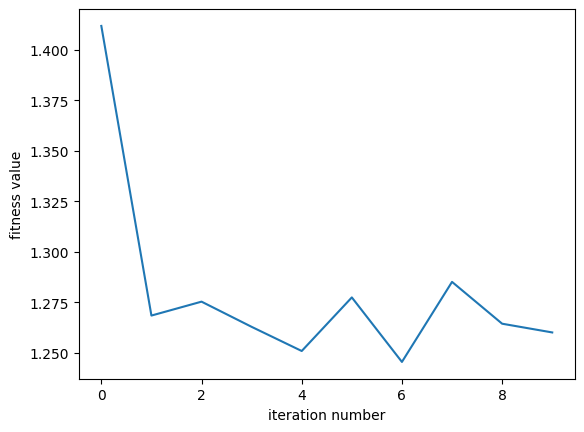

In [72]:
plt.plot(list(range(10)),sda1_response[0])
plt.ylabel('fitness value')
plt.xlabel('iteration number')

In [74]:
sda3 = sda(3)
sda3_response = quantumGeneticAlgorithm(sda3,pop_size,pcc,pc,pm,pmm,n_max,m_max,N_max[1])

--------------------generation : 1 ------------------
best fitness : 1.7484967805356249
best chromosome cluster numbers : 2
best chrom fit : 1.7484967805356249
best chrom cluster numbers : 2
--------------------generation : 2 ------------------
best fitness : 1.7163087405584672
best chromosome cluster numbers : 2
best chrom fit : 1.7484967805356249
best chrom cluster numbers : 2
--------------------generation : 3 ------------------
best fitness : 1.7484967805356249
best chromosome cluster numbers : 2
best chrom fit : 1.7484967805356249
best chrom cluster numbers : 2
--------------------generation : 4 ------------------
best fitness : 1.7484967805356249
best chromosome cluster numbers : 2
best chrom fit : 1.7484967805356249
best chrom cluster numbers : 2
--------------------generation : 5 ------------------
best fitness : 1.7484967805356249
best chromosome cluster numbers : 2
best chrom fit : 1.7484967805356249
best chrom cluster numbers : 2
--------------------generation : 6 ----------

In [76]:
spectf_dataset = read_df(spectf_train)[:,1:]
# fitness,bestI,bestJ = two_point_bruteforce(spectf_dataset)
spectf_dataset.shape

Attempting to download: spect/SPECTF.train
0%-819200%-1638400%
Download Complete!


(80, 44)

In [79]:
glass_dataset = read_df(glass_addr)
glass_dataset
# glass_response = quantumGeneticAlgorithm(glass_dataset,pop_size,pcc,pc,pm,pmm,n_max,m_max,N_max[1],2)

array([[  1.     ,   1.52101,  13.64   , ...,   0.     ,   0.     ,
          1.     ],
       [  2.     ,   1.51761,  13.89   , ...,   0.     ,   0.     ,
          1.     ],
       [  3.     ,   1.51618,  13.53   , ...,   0.     ,   0.     ,
          1.     ],
       ...,
       [212.     ,   1.52065,  14.36   , ...,   1.64   ,   0.     ,
          7.     ],
       [213.     ,   1.51651,  14.38   , ...,   1.57   ,   0.     ,
          7.     ],
       [214.     ,   1.51711,  14.23   , ...,   1.67   ,   0.     ,
          7.     ]])

Text(0.5, 0, 'iteration number')

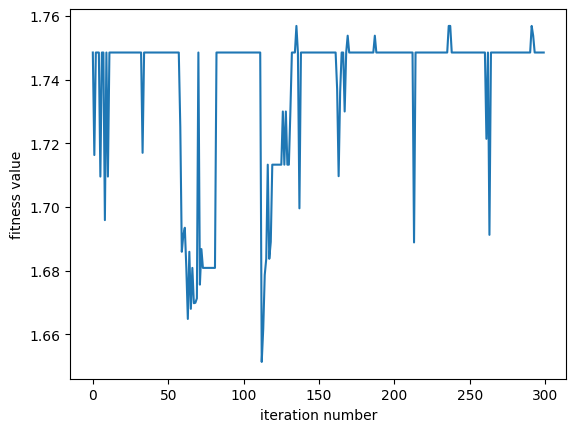

In [81]:
plt.plot(list(range(N_max[1])),sda3_response[0])
plt.ylabel('fitness value')
plt.xlabel('iteration number')

<ipython-input-82-10223d0561c7>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sda3[:, 0], sda3[:, 1],c=colorMapGenerator(sda3_response[1].r,sda3), s=50, cmap='red')


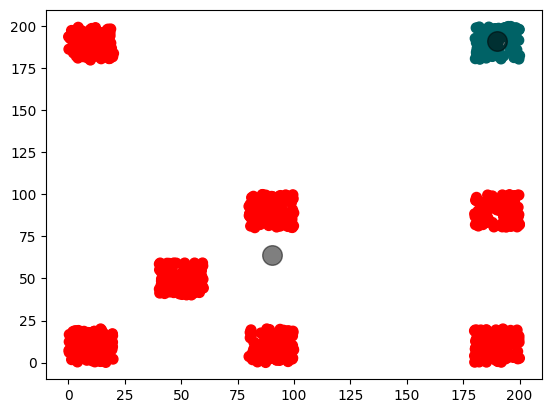

In [82]:
plt.scatter(sda3[:, 0], sda3[:, 1],c=colorMapGenerator(sda3_response[1].r,sda3), s=50, cmap='red')
centers = np.array([pattern.centroid for pattern in sda3_response[1].r])
plt.scatter(centers[:,0], centers[:, 1], c='black', s=200, alpha=0.5);

In [83]:
iris_dataset = read_df(iris_addr)[:,:-1].astype(float)
iris_response = quantumGeneticAlgorithm(iris_dataset,pop_size,pcc,pc,pm,pmm,n_max,m_max,N_max[1],3)

Attempting to download: iris/iris.data
0%-819200%
Download Complete!
--------------------generation : 1 ------------------
best fitness : 1.7313553150952938
best chromosome cluster numbers : 3
best chrom fit : 1.7313553150952938
best chrom cluster numbers : 3
--------------------generation : 2 ------------------
best fitness : 2.113881542906874
best chromosome cluster numbers : 3
best chrom fit : 2.113881542906874
best chrom cluster numbers : 3
--------------------generation : 3 ------------------
best fitness : 1.7552160182606904
best chromosome cluster numbers : 3
best chrom fit : 2.113881542906874
best chrom cluster numbers : 3
--------------------generation : 4 ------------------
best fitness : 1.7350604113144674
best chromosome cluster numbers : 3
best chrom fit : 2.113881542906874
best chrom cluster numbers : 3
--------------------generation : 5 ------------------
best fitness : 2.652133694552581
best chromosome cluster numbers : 3
best chrom fit : 2.652133694552581
best chrom cl